# TODO
* Rapporto tra lavori attivati e cessati in stessi intervalli temporali
* Eventi passati che possono aver influenzato l'attivazione o la cessazione di nuovi lavori
* Correlazione tra lavori attivati e persone pronte per il lavoro(es: appena laureate)
    * Pensare a cosa fare con i dati riguardanti le scuole
* 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Study on dataset **Activated Labours**

In [2]:
!ls

lab1.ipynb  Rapporti_di_lavoro_attivati.csv


In [3]:
activated_labours = pd.read_csv('Rapporti_di_lavoro_attivati.csv')
activated_labours.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA


In [4]:
len(activated_labours)

9579794

In [5]:
activated_labours.loc[:, ['TITOLOSTUDIO']].value_counts()

TITOLOSTUDIO                                                                                                           
NESSUN TITOLO DI STUDIO                                                                                                    2721891
LICENZA MEDIA                                                                                                              2523342
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA                                          2430781
LAUREA - Vecchio o nuovo ordinamento                                                                                        988171
TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()     645228
LICENZA ELEMENTARE                                                                                                           82570
DIPLOMA UNIVERSITARIO                                                                         

### Rename column 'italiano' into 'nazionalita'

In [6]:
activated_labours.rename({'ITALIANO': 'NAZIONALITA'}, axis=1, inplace=True)

In [7]:
activated_labours.loc[:, ['NAZIONALITA']].value_counts()

NAZIONALITA    
ITALIA             7223698
ROMANIA             383902
ALBANIA             178277
EGITTO              173807
MAROCCO             167564
                    ...   
SUD SUDAN                2
NAURU                    2
BELIZE                   2
Timor Orientale          1
SAMOA                    1
Length: 199, dtype: int64

In [8]:
activated_labours.duplicated().sum()

1009435

the presence of duplicated lines is not meaningful because there could be different people with same characteristics having activated a labour in the same day

### Null values inspection

In [9]:
activated_labours.isnull().sum()

DATA                              0
GENERE                            0
ETA                               0
SETTOREECONOMICODETTAGLIO      2888
TITOLOSTUDIO                    580
CONTRATTO                         0
MODALITALAVORO               440779
PROVINCIAIMPRESA                  0
NAZIONALITA                       0
dtype: int64

In [10]:
activated_labours.loc[:, ['MODALITALAVORO']].value_counts()

MODALITALAVORO            
TEMPO PIENO                   5337940
TEMPO PARZIALE ORIZZONTALE    2026056
NON DEFINITO                  1087460
TEMPO PARZIALE MISTO           445419
TEMPO PARZIALE VERTICALE       242140
dtype: int64

Fill null values into **modalità lavoro** with value **NON DEFINITO**

In [11]:
activated_labours['MODALITALAVORO'] = activated_labours['MODALITALAVORO'].fillna('NON DEFINITO')
activated_labours['MODALITALAVORO'].isnull().sum()

0

In [12]:
counts = activated_labours.loc[:, ['SETTOREECONOMICODETTAGLIO']].value_counts()
counts

SETTOREECONOMICODETTAGLIO                                                                                                                                                      
Alberghi                                                                                                                                                                           467057
Ristorazione con somministrazione                                                                                                                                                  445191
Attività di produzione cinematografica, di video e di programmi televisivi                                                                                                         379116
Attività di famiglie e convivenze come datori di lavoro per personale domestico                                                                                                    348181
Altri servizi di supporto alle imprese nca                                      

In [21]:
counts.values

array([467057, 445191, 379116, 348181, 303280, 263607, 263316, 236350,
       169532, 160911, 159684, 130590, 127729, 127315, 107872, 105060,
       102752,  87761])

<BarContainer object of 18 artists>

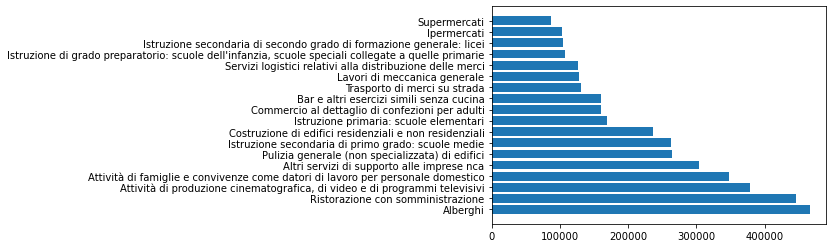

In [24]:
LIMIT = 80000
counts = counts[counts.values > LIMIT]
plt.barh(y=[i[0] for i in counts.index], width=counts.values)

In [14]:
for i in counts.index:
    print(i[0])

Alberghi
Ristorazione con somministrazione
Attività di produzione cinematografica, di video e di programmi televisivi
Attività di famiglie e convivenze come datori di lavoro per personale domestico
Altri servizi di supporto alle imprese nca
Pulizia generale (non specializzata) di edifici
Istruzione secondaria di primo grado: scuole medie
Costruzione di edifici residenziali e non residenziali
Istruzione primaria: scuole elementari
Commercio al dettaglio di confezioni per adulti
Bar e altri esercizi simili senza cucina
Trasporto di merci su strada
Lavori di meccanica generale
Servizi logistici relativi alla distribuzione delle merci
Istruzione di grado preparatorio: scuole dell'infanzia, scuole speciali collegate a quelle primarie
Istruzione secondaria di secondo grado di formazione generale: licei
Ipermercati
Supermercati


Column **settore economico dettaglio** contains too general information and not enough useful concerning our study.
For now i'll drop it.

In [15]:
activated_labours.drop('settoreeconomicodettaglio', axis=1, inplace=True)
activated_labours.columns

KeyError: "['settoreeconomicodettaglio'] not found in axis"

### Study on dataset **Ceased Labours**

In [ ]:
ceased_labours = pd.read_json('https://www.dati.lombardia.it/resource/nwz3-p6vm.json')
ceased_labours.head()

,data,genere,eta,settoreeconomicodettaglio,titolostudio,contratto,modalitalavoro,provinciaimpresa,italiano
0,2019-04-02T00:00:00.000,M,20,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
1,2018-06-08T00:00:00.000,F,28,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
2,2016-02-02T00:00:00.000,F,20,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,2015-01-12T00:00:00.000,M,59,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,2017-08-09T00:00:00.000,M,61,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


In [ ]:
ceased_labours.loc[:, ['titolostudio']].value_counts()

titolostudio                                                                                                           
LICENZA MEDIA                                                                                                              404
NESSUN TITOLO DI STUDIO                                                                                                    222
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA                                          206
TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()     87
LAUREA - Vecchio o nuovo ordinamento                                                                                        61
LICENZA ELEMENTARE                                                                                                          10
DIPLOMA DI SPECIALIZZAZIONE                                                                                           

### Rename column 'italiano' into 'nazionalità'

In [ ]:
ceased_labours.rename({'italiano': 'nazionalità'}, axis=1, inplace=True)

In [ ]:
ceased_labours.loc[:, ['settoreeconomicodettaglio']].value_counts()

settoreeconomicodettaglio                                                      
Ristorazione con somministrazione                                                  108
Costruzione di edifici residenziali e non residenziali                              57
Attività di famiglie e convivenze come datori di lavoro per personale domestico     53
Fabbricazione di altri rubinetti e valvole                                          46
Bar e altri esercizi simili senza cucina                                            41
                                                                                  ... 
Commercio di energia elettrica                                                       1
Commercio all'ingrosso di tappeti                                                    1
Commercio all'ingrosso di parti e accessori di autoveicoli                           1
Commercio all'ingrosso di carne fresca, congelata e surgelata                        1
Villaggi turistici                                

In [ ]:
ceased_labours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   data                       1000 non-null   object
 1   genere                     1000 non-null   object
 2   eta                        1000 non-null   int64 
 3   settoreeconomicodettaglio  993 non-null    object
 4   titolostudio               1000 non-null   object
 5   contratto                  1000 non-null   object
 6   modalitalavoro             1000 non-null   object
 7   provinciaimpresa           1000 non-null   object
 8   italiano                   1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


In [ ]:
ceased_labours.iloc[:, 0].values

array(['2019-04-02T00:00:00.000', '2018-06-08T00:00:00.000',
       '2016-02-02T00:00:00.000', '2015-01-12T00:00:00.000',
       '2017-08-09T00:00:00.000', '2012-10-12T00:00:00.000',
       '2013-03-04T00:00:00.000', '2021-06-10T00:00:00.000',
       '2010-09-04T00:00:00.000', '2020-01-07T00:00:00.000',
       '2015-10-03T00:00:00.000', '2013-02-01T00:00:00.000',
       '2017-02-11T00:00:00.000', '2019-04-05T00:00:00.000',
       '2020-11-06T00:00:00.000', '2013-02-05T00:00:00.000',
       '2017-10-11T00:00:00.000', '2013-03-09T00:00:00.000',
       '2013-03-09T00:00:00.000', '2016-11-02T00:00:00.000',
       '2019-04-05T00:00:00.000', '2020-02-05T00:00:00.000',
       '2011-11-04T00:00:00.000', '2010-09-04T00:00:00.000',
       '2011-04-04T00:00:00.000', '2015-04-12T00:00:00.000',
       '2009-03-06T00:00:00.000', '2013-03-01T00:00:00.000',
       '2011-10-10T00:00:00.000', '2014-06-06T00:00:00.000',
       '2011-09-09T00:00:00.000', '2013-09-10T00:00:00.000',
       '2018-06-11T00:00

In [ ]:
ceased_labours['year'] = ceased_labours['data'].apply(lambda x:x[0: 4])
ceased_labours['year'].value_counts()

2019    159
2020    129
2021    128
2018     90
2011     65
2013     62
2010     59
2017     57
2012     53
2016     52
2015     52
2014     49
2009     44
2008      1
Name: year, dtype: int64

In [ ]:
ceased_labours[ceased_labours.year == '2019']

,data,genere,eta,settoreeconomicodettaglio,titolostudio,contratto,modalitalavoro,provinciaimpresa,italiano,year
0,2019-04-02T00:00:00.000,M,20,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2019
13,2019-04-05T00:00:00.000,F,53,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019
20,2019-04-05T00:00:00.000,M,49,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019
39,2019-04-01T00:00:00.000,F,24,"Discoteche, sale da ballo night-club e simili",LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,LECCO,ITALIA,2019
44,2019-06-06T00:00:00.000,F,25,Attività di musei,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE,NON DEFINITO,LECCO,ITALIA,2019
...,...,...,...,...,...,...,...,...,...,...
961,2019-02-01T00:00:00.000,M,31,Trasporto di merci su strada,LICENZA MEDIA,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MANTOVA,MAROCCO,2019
964,2019-09-10T00:00:00.000,M,21,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,TIROCINIO,TEMPO PARZIALE ORIZZONTALE,MANTOVA,ITALIA,2019
968,2019-03-01T00:00:00.000,F,80,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PARZIALE ORIZZONTALE,MANTOVA,ITALIA,2019
978,2019-10-06T00:00:00.000,M,40,Altre attività connesse ai trasporti terrestri...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MANTOVA,ITALIA,2019
